In [1]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
df= pd.read_csv('studentmath.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
def assign_cat_codes(df, col_name):
    col_index = df.columns.get_loc(col_name)
    df[col_name] = df[col_name].astype('category')
    df.insert(col_index + 1, f'{col_name}_cat', df[col_name].cat.codes)
    df.drop(columns=[col_name], inplace=True)
    
columns_to_convert = ['school', 'sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

for col in columns_to_convert:
    assign_cat_codes(df, col)
    

In [7]:
df.head()

,school_cat,sex_cat,age,address_cat,famsize_cat,Pstatus_cat,Medu,Fedu,Mjob_cat,Fjob_cat,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == va

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.482315112540192
Column: school_cat, Value: 1, Mean: 9.863636363636363
Column: sex_cat, Value: 0, Mean: 9.890710382513662
Column: sex_cat, Value: 1, Mean: 10.953488372093023
Column: address_cat, Value: 1, Mean: 10.704379562043796
Column: address_cat, Value: 0, Mean: 9.395061728395062
Column: famsize_cat, Value: 0, Mean: 10.208661417322835
Column: famsize_cat, Value: 1, Mean: 10.900990099009901
Column: Pstatus_cat, Value: 0, Mean: 11.0
Column: Pstatus_cat, Value: 1, Mean: 10.336477987421384
Column: Mjob_cat, Value: 0, Mean: 9.12962962962963
Column: Mjob_cat, Value: 1, Mean: 12.03448275862069
Column: Mjob_cat, Value: 2, Mean: 9.95
Column: Mjob_cat, Value: 3, Mean: 10.96938775510204
Column: Mjob_cat, Value: 4, Mean: 10.796296296296296
Column: Fjob_cat, Value: 4, Mean: 11.8
Column: Fjob_cat, Value: 2, Mean: 10.178947368421053
Column: Fjob_cat, Value: 3, Mean: 10.257142857142858
Column: Fjob_cat, Value: 1, Mean: 11.61111111111111
Column: Fjob_cat, Value

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.504823151125402
Column: school_cat, Value: 1, Mean: 10.295454545454545
Column: sex_cat, Value: 0, Mean: 10.063492063492063
Column: sex_cat, Value: 1, Mean: 10.951807228915662
Column: address_cat, Value: 1, Mean: 10.774545454545455
Column: address_cat, Value: 0, Mean: 9.4625
Column: famsize_cat, Value: 0, Mean: 10.211155378486056
Column: famsize_cat, Value: 1, Mean: 11.125
Column: Pstatus_cat, Value: 0, Mean: 11.285714285714286
Column: Pstatus_cat, Value: 1, Mean: 10.390625
Column: Mjob_cat, Value: 0, Mean: 8.909090909090908
Column: Mjob_cat, Value: 1, Mean: 13.035714285714286
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 11.043010752688172
Column: Mjob_cat, Value: 4, Mean: 11.235294117647058
Column: Fjob_cat, Value: 4, Mean: 12.192307692307692
Column: Fjob_cat, Value: 2, Mean: 10.015
Column: Fjob_cat, Value: 3, Mean: 10.770833333333334
Column: Fjob_cat, Value: 1, Mean: 12.133333333333333
Column: Fjob_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.710191082802547
Column: school_cat, Value: 1, Mean: 9.658536585365853
Column: sex_cat, Value: 0, Mean: 10.221621621621622
Column: sex_cat, Value: 1, Mean: 10.988235294117647
Column: address_cat, Value: 1, Mean: 10.910780669144982
Column: address_cat, Value: 0, Mean: 9.581395348837209
Column: famsize_cat, Value: 0, Mean: 10.416
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.411764705882353
Column: Pstatus_cat, Value: 1, Mean: 10.501557632398754
Column: Mjob_cat, Value: 0, Mean: 9.795918367346939
Column: Mjob_cat, Value: 1, Mean: 12.4375
Column: Mjob_cat, Value: 2, Mean: 9.884615384615385
Column: Mjob_cat, Value: 3, Mean: 11.08695652173913
Column: Mjob_cat, Value: 4, Mean: 11.076923076923077
Column: Fjob_cat, Value: 4, Mean: 12.583333333333334
Column: Fjob_cat, Value: 2, Mean: 10.257575757575758
Column: Fjob_cat, Value: 3, Mean: 10.574257425742575
Column: Fjob_cat, Value: 1, Mean: 11.866666666666667
Column: Fjob_ca

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.420382165605096
Column: school_cat, Value: 1, Mean: 9.926829268292684
Column: sex_cat, Value: 0, Mean: 9.777777777777779
Column: sex_cat, Value: 1, Mean: 11.03012048192771
Column: address_cat, Value: 1, Mean: 10.583333333333334
Column: address_cat, Value: 0, Mean: 9.594936708860759
Column: famsize_cat, Value: 0, Mean: 10.076
Column: famsize_cat, Value: 1, Mean: 11.047619047619047
Column: Pstatus_cat, Value: 0, Mean: 11.088235294117647
Column: Pstatus_cat, Value: 1, Mean: 10.286604361370717
Column: Mjob_cat, Value: 0, Mean: 9.0
Column: Mjob_cat, Value: 1, Mean: 12.137931034482758
Column: Mjob_cat, Value: 2, Mean: 9.766129032258064
Column: Mjob_cat, Value: 3, Mean: 11.052083333333334
Column: Mjob_cat, Value: 4, Mean: 10.90566037735849
Column: Fjob_cat, Value: 4, Mean: 11.538461538461538
Column: Fjob_cat, Value: 2, Mean: 10.26530612244898
Column: Fjob_cat, Value: 3, Mean: 10.164948453608247
Column: Fjob_cat, Value: 1, Mean: 11.125
Column: Fjob_cat, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.548895899053628
Column: school_cat, Value: 1, Mean: 9.578947368421053
Column: sex_cat, Value: 0, Mean: 10.026881720430108
Column: sex_cat, Value: 1, Mean: 10.905325443786982
Column: address_cat, Value: 1, Mean: 10.715827338129497
Column: address_cat, Value: 0, Mean: 9.467532467532468
Column: famsize_cat, Value: 0, Mean: 10.224409448818898
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.555555555555555
Column: Pstatus_cat, Value: 1, Mean: 10.31974921630094
Column: Mjob_cat, Value: 0, Mean: 9.11320754716981
Column: Mjob_cat, Value: 1, Mean: 11.8
Column: Mjob_cat, Value: 2, Mean: 9.8515625
Column: Mjob_cat, Value: 3, Mean: 11.119565217391305
Column: Mjob_cat, Value: 4, Mean: 11.288461538461538
Column: Fjob_cat, Value: 4, Mean: 11.846153846153847
Column: Fjob_cat, Value: 2, Mean: 10.243523316062177
Column: Fjob_cat, Value: 3, Mean: 10.247524752475247
Column: Fjob_cat, Value: 1, Mean: 11.9375
Column: Fjob_cat, Value: 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.579113924050633
Column: school_cat, Value: 1, Mean: 10.025
Column: sex_cat, Value: 0, Mean: 10.137566137566138
Column: sex_cat, Value: 1, Mean: 10.946107784431138
Column: address_cat, Value: 1, Mean: 10.704225352112676
Column: address_cat, Value: 0, Mean: 9.777777777777779
Column: famsize_cat, Value: 0, Mean: 10.264822134387352
Column: famsize_cat, Value: 1, Mean: 11.135922330097088
Column: Pstatus_cat, Value: 0, Mean: 10.972222222222221
Column: Pstatus_cat, Value: 1, Mean: 10.465625
Column: Mjob_cat, Value: 0, Mean: 9.320754716981131
Column: Mjob_cat, Value: 1, Mean: 12.193548387096774
Column: Mjob_cat, Value: 2, Mean: 9.9140625
Column: Mjob_cat, Value: 3, Mean: 11.362637362637363
Column: Mjob_cat, Value: 4, Mean: 10.735849056603774
Column: Fjob_cat, Value: 4, Mean: 11.4
Column: Fjob_cat, Value: 2, Mean: 10.375
Column: Fjob_cat, Value: 3, Mean: 10.413461538461538
Column: Fjob_cat, Value: 1, Mean: 11.823529411764707
Column: Fjob_cat, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.353503184713375
Column: school_cat, Value: 1, Mean: 9.571428571428571
Column: sex_cat, Value: 0, Mean: 9.718918918918918
Column: sex_cat, Value: 1, Mean: 10.847953216374268
Column: address_cat, Value: 1, Mean: 10.552727272727273
Column: address_cat, Value: 0, Mean: 9.271604938271604
Column: famsize_cat, Value: 0, Mean: 10.0
Column: famsize_cat, Value: 1, Mean: 10.92079207920792
Column: Pstatus_cat, Value: 0, Mean: 11.075
Column: Pstatus_cat, Value: 1, Mean: 10.158227848101266
Column: Mjob_cat, Value: 0, Mean: 9.210526315789474
Column: Mjob_cat, Value: 3, Mean: 10.87912087912088
Column: Mjob_cat, Value: 2, Mean: 9.512
Column: Mjob_cat, Value: 4, Mean: 11.132075471698114
Column: Mjob_cat, Value: 1, Mean: 11.966666666666667
Column: Fjob_cat, Value: 4, Mean: 11.857142857142858
Column: Fjob_cat, Value: 2, Mean: 9.96875
Column: Fjob_cat, Value: 1, Mean: 11.352941176470589
Column: Fjob_cat, Value: 3, Mean: 10.212121212121213
Column: Fjob_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.472843450479234
Column: school_cat, Value: 1, Mean: 9.790697674418604
Column: sex_cat, Value: 0, Mean: 9.946236559139784
Column: sex_cat, Value: 1, Mean: 10.876470588235295
Column: address_cat, Value: 1, Mean: 10.620938628158845
Column: address_cat, Value: 0, Mean: 9.582278481012658
Column: famsize_cat, Value: 0, Mean: 10.2109375
Column: famsize_cat, Value: 1, Mean: 10.85
Column: Pstatus_cat, Value: 1, Mean: 10.272151898734178
Column: Pstatus_cat, Value: 0, Mean: 11.325
Column: Mjob_cat, Value: 0, Mean: 9.462962962962964
Column: Mjob_cat, Value: 1, Mean: 12.0625
Column: Mjob_cat, Value: 2, Mean: 9.59375
Column: Mjob_cat, Value: 3, Mean: 11.0
Column: Mjob_cat, Value: 4, Mean: 11.25531914893617
Column: Fjob_cat, Value: 2, Mean: 10.164179104477611
Column: Fjob_cat, Value: 3, Mean: 10.123711340206185
Column: Fjob_cat, Value: 4, Mean: 12.96
Column: Fjob_cat, Value: 1, Mean: 11.3125
Column: Fjob_cat, Value: 0, Mean: 9.941176470588236
Column: reason_cat,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.389240506329115
Column: school_cat, Value: 1, Mean: 10.0
Column: sex_cat, Value: 0, Mean: 9.98421052631579
Column: sex_cat, Value: 1, Mean: 10.759036144578314
Column: address_cat, Value: 1, Mean: 10.559139784946236
Column: address_cat, Value: 0, Mean: 9.571428571428571
Column: famsize_cat, Value: 0, Mean: 10.075396825396826
Column: famsize_cat, Value: 1, Mean: 11.0
Column: Pstatus_cat, Value: 0, Mean: 11.210526315789474
Column: Pstatus_cat, Value: 1, Mean: 10.242138364779874
Column: Mjob_cat, Value: 0, Mean: 8.807692307692308
Column: Mjob_cat, Value: 1, Mean: 11.96875
Column: Mjob_cat, Value: 2, Mean: 9.984615384615385
Column: Mjob_cat, Value: 3, Mean: 10.863636363636363
Column: Mjob_cat, Value: 4, Mean: 10.88888888888889
Column: Fjob_cat, Value: 4, Mean: 11.75
Column: Fjob_cat, Value: 2, Mean: 10.213197969543147
Column: Fjob_cat, Value: 3, Mean: 10.23
Column: Fjob_cat, Value: 1, Mean: 11.466666666666667
Column: Fjob_cat, Value: 0, Mean: 9.1875
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Column: school_cat, Value: 0, Mean: 10.438095238095238
Column: school_cat, Value: 1, Mean: 9.731707317073171
Column: sex_cat, Value: 0, Mean: 9.894736842105264
Column: sex_cat, Value: 1, Mean: 10.885542168674698
Column: address_cat, Value: 1, Mean: 10.623188405797102
Column: address_cat, Value: 0, Mean: 9.4375
Column: famsize_cat, Value: 0, Mean: 10.094488188976378
Column: famsize_cat, Value: 1, Mean: 11.009803921568627
Column: Pstatus_cat, Value: 0, Mean: 11.051282051282051
Column: Pstatus_cat, Value: 1, Mean: 10.271293375394322
Column: Mjob_cat, Value: 0, Mean: 8.803921568627452
Column: Mjob_cat, Value: 1, Mean: 11.909090909090908
Column: Mjob_cat, Value: 2, Mean: 9.8828125
Column: Mjob_cat, Value: 3, Mean: 10.813186813186814
Column: Mjob_cat, Value: 4, Mean: 11.245283018867925
Column: Fjob_cat, Value: 4, Mean: 11.821428571428571
Column: Fjob_cat, Value: 2, Mean: 10.257731958762887
Column: Fjob_cat, Value: 3, Mean: 9.97979797979798
Column: Fjob_cat, Value: 1, Mean: 11.529411764705882

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-2203fe98178b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-2203fe98178b>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Elapsed time: 684.18988 seconds


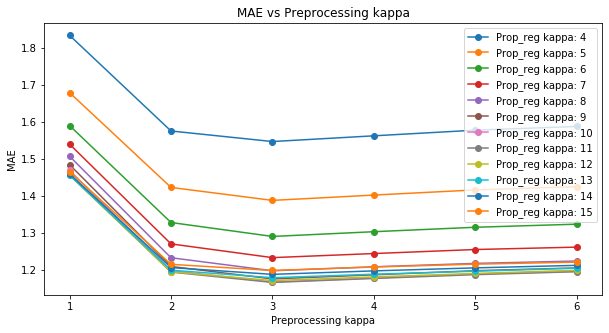

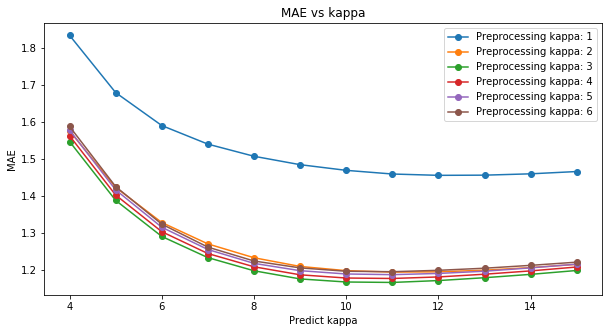

Optimal Preprocessing kappa: 3
Optimal Prop_reg kappa: 11
Minimum MAE: 1.16544108988414


In [8]:
start_time = time.perf_counter()
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



import matplotlib.pyplot as plt

X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

ordinal_columns = ['famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2','traveltime', 'studytime',
       'failures','Medu', 'Fedu','age']

kappa_values_preprocessing = [1,2,3,4,5,6]
kappa_values_prop_reg = [4,5,6,7,8,9,10,11,12,13,14,15]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)


end_time = time.perf_counter()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.5f} seconds")

# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Predict kappa')
plt.ylabel('MAE')
plt.title('MAE vs kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


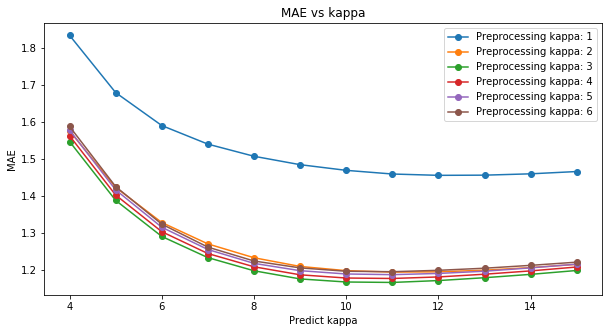

In [9]:
# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Predict kappa')
plt.ylabel('MAE')
plt.title('MAE vs kappa')
plt.legend()
plt.show()


In [10]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print(f"Preprocessing kappa: {kappa_preprocessing}, Prop_reg kappa: {kappa_prop_reg}, MAE: {mae}")
    

Kappa combinations and their MAE values:
Preprocessing kappa: 1, Prop_reg kappa: 4, MAE: 1.8345136267850897
Preprocessing kappa: 1, Prop_reg kappa: 5, MAE: 1.6794421071276726
Preprocessing kappa: 1, Prop_reg kappa: 6, MAE: 1.590274765051435
Preprocessing kappa: 1, Prop_reg kappa: 7, MAE: 1.5399520382241971
Preprocessing kappa: 1, Prop_reg kappa: 8, MAE: 1.5070805502482143
Preprocessing kappa: 1, Prop_reg kappa: 9, MAE: 1.4843204801506196
Preprocessing kappa: 1, Prop_reg kappa: 10, MAE: 1.46896514391542
Preprocessing kappa: 1, Prop_reg kappa: 11, MAE: 1.4590531987394835
Preprocessing kappa: 1, Prop_reg kappa: 12, MAE: 1.4554566751416498
Preprocessing kappa: 1, Prop_reg kappa: 13, MAE: 1.4559566347005553
Preprocessing kappa: 1, Prop_reg kappa: 14, MAE: 1.4595707094963104
Preprocessing kappa: 1, Prop_reg kappa: 15, MAE: 1.4657842445769145
Preprocessing kappa: 2, Prop_reg kappa: 4, MAE: 1.5755402225461355
Preprocessing kappa: 2, Prop_reg kappa: 5, MAE: 1.4227200678907566
Preprocessing kapp

In [11]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

start_time = time.perf_counter()
# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

end_time = time.perf_counter()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.5f} seconds")

start_time = time.perf_counter()
# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)
end_time = time.perf_counter()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.5f} seconds")

start_time = time.perf_counter()
# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)
end_time = time.perf_counter()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.5f} seconds")

start_time = time.perf_counter()
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)
end_time = time.perf_counter()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.5f} seconds")

1.4618571428571427
Elapsed time: 2.49842 seconds
1.5160714285714285
Elapsed time: 0.05298 seconds
1.8135714285714286
Elapsed time: 0.02495 seconds
1.4943300915083715
Elapsed time: 3.00301 seconds
